In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install tpot

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Uploading

In [5]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip"

--2024-11-25 20:00:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [             <=>    ]  73.05M  15.9MB/s    in 5.3s    

2024-11-25 20:01:01 (13.7 MB/s) - ‘data.zip’ saved [76601704]



In [6]:
!unzip "data.zip"

Archive:  data.zip
  inflating: CE.txt                  
  inflating: CP.txt                  
  inflating: description.txt         
  inflating: EPS1.txt                
  inflating: FS1.txt                 
  inflating: FS2.txt                 
  inflating: profile.txt             
  inflating: PS1.txt                 
  inflating: PS2.txt                 
  inflating: PS3.txt                 
  inflating: PS4.txt                 
  inflating: PS5.txt                 
  inflating: PS6.txt                 
  inflating: SE.txt                  
  inflating: TS1.txt                 
  inflating: TS2.txt                 
  inflating: TS3.txt                 
  inflating: TS4.txt                 
  inflating: VS1.txt                 
  inflating: documentation.txt       


# 1- Data Preperation

In [7]:
a=[]
for i in ["PS1","PS2","PS3","PS4","PS5","PS6"]:
    PS=np.genfromtxt(r"/kaggle/working"+"/"+i+".txt")
    a.append(PS)
ps1,ps2,ps3,ps4,ps5,ps6=a

In [8]:
ps1

array([[151.47, 151.45, 151.52, ..., 151.1 , 151.21, 151.19],
       [151.11, 151.12, 151.16, ..., 150.79, 150.8 , 150.86],
       [150.81, 150.79, 150.84, ..., 150.43, 150.54, 150.62],
       ...,
       [151.73, 151.78, 151.84, ..., 151.73, 151.73, 151.83],
       [151.77, 151.77, 151.75, ..., 151.68, 151.71, 151.78],
       [151.83, 151.78, 151.77, ..., 151.73, 151.71, 151.7 ]])

In [9]:
ps1.shape

(2205, 6000)

In [18]:
ps1_arr.shape

(132300,)

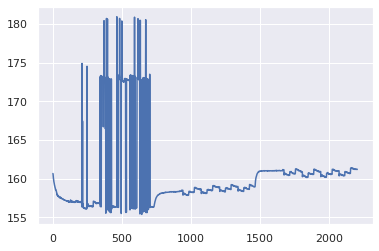

In [21]:
plt.plot(ps1_arr)

In [22]:
np.isnan(ps1).sum()

0

In [23]:
ps2

array([[125.5 , 125.39, 125.4 , ..., 125.11, 125.14, 125.1 ],
       [125.06, 125.08, 125.09, ..., 125.13, 125.09, 125.04],
       [125.13, 125.27, 125.23, ..., 124.73, 124.77, 124.88],
       ...,
       [125.41, 125.49, 125.63, ..., 125.84, 125.84, 125.94],
       [125.91, 125.73, 125.59, ..., 125.73, 125.86, 125.91],
       [125.88, 125.86, 125.84, ..., 125.77, 125.66, 125.77]])

In [24]:
ps1_arr=ps1.mean(axis=1)
ps1_arr

array([160.67349167, 160.60332   , 160.34772   , ..., 161.19212   ,
       161.20891667, 161.21712833])

In [25]:
ps2_arr=ps2.mean(axis=1)
ps2_arr

array([109.4669135 , 109.35489033, 109.15884467, ..., 109.75617433,
       109.79388383, 109.7921765 ])

In [26]:
ps3_arr=ps3.mean(axis=1)
ps3_arr

array([1.99147533, 1.97623433, 1.972224  , ..., 1.99343617, 2.00707683,
       2.00269017])

In [27]:
ps4_arr=ps4.mean(axis=1)
ps4_arr

array([ 0.        ,  0.        ,  0.        , ..., 10.19682367,
       10.19858833, 10.20312583])

In [28]:
ps5_arr=ps5.mean(axis=1)
ps5_arr

array([9.8421695 , 9.63514217, 9.53054783, ..., 9.96432917, 9.96823183,
       9.97363767])

In [29]:
ps6_arr=ps6.mean(axis=1)
ps6_arr

array([9.7280975 , 9.52948783, 9.42794883, ..., 9.8426285 , 9.84668967,
       9.85194917])

In [30]:
df=pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

In [31]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636


In [32]:
eps1=np.genfromtxt(r"/kaggle/working/EPS1.txt")

In [33]:
esp1_arr=eps1.mean(axis=1)
esp1_arr

array([2538.92916667, 2531.4989    , 2519.928     , ..., 2542.72976667,
       2544.04633333, 2543.8183    ])

In [36]:
df["ESP1"]=esp1_arr

In [37]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500


In [38]:
a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt(r"/kaggle/working"+"/"+i+".txt")
    a.append(FS)
fs1,fs2=a

In [39]:
fs1_arr=fs1.mean(axis=1)
fs1_arr

array([6.709815  , 6.715315  , 6.71852167, ..., 6.69327667, 6.68412833,
       6.69230167])

In [40]:
fs2_arr=fs2.mean(axis=1)
fs2_arr

array([10.30459167, 10.40309833, 10.36625   , ..., 10.17617167,
       10.17835333, 10.18339333])

In [41]:
df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

In [42]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750


In [43]:
a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt(r"/kaggle/working"+"/"+i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a

In [44]:
ts1_arr=ts1.mean(axis=1)
ts1_arr

array([35.62198333, 36.67696667, 37.8808    , ..., 35.31918333,
       35.32476667, 35.32223333])

In [45]:
ts2_arr=ts2.mean(axis=1)
ts2_arr

array([40.97876667, 41.53276667, 42.44245   , ..., 40.87595   ,
       40.87606667, 40.8594    ])

In [46]:
ts3_arr=ts3.mean(axis=1)
ts3_arr

array([38.47101667, 38.97896667, 39.63195   , ..., 38.24636667,
       38.24573333, 38.24891667])

In [47]:
ts4_arr=ts4.mean(axis=1)
ts4_arr

array([31.74525   , 34.49386667, 35.64615   , ..., 30.42625   ,
       30.41428333, 30.3908    ])

In [48]:
df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

In [49]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900


In [50]:
vs1=np.genfromtxt(r"/kaggle/working/VS1.txt")

In [51]:
vs1

array([[0.604, 0.605, 0.611, ..., 0.545, 0.535, 0.543],
       [0.59 , 0.61 , 0.626, ..., 0.533, 0.531, 0.534],
       [0.578, 0.603, 0.638, ..., 0.544, 0.53 , 0.534],
       ...,
       [0.566, 0.562, 0.561, ..., 0.512, 0.515, 0.517],
       [0.529, 0.539, 0.552, ..., 0.522, 0.52 , 0.528],
       [0.541, 0.553, 0.565, ..., 0.522, 0.522, 0.531]])

In [52]:
vs1_arr=vs1.mean(axis=1)
vs1_arr

array([0.57695   , 0.56585   , 0.57653333, ..., 0.54523333, 0.53701667,
       0.54658333])

In [53]:
df["VS1"]=vs1_arr

In [54]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367


In [55]:
a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt(r"/kaggle/working"+"/"+i+".txt")
    a.append(C)
ce,cp=a

In [56]:
ce_arr=ce.mean(axis=1)
ce_arr

array([39.60135   , 25.78643333, 22.21823333, ..., 46.4723    ,
       46.54496667, 46.64793333])

In [57]:
cp_arr=cp.mean(axis=1)
cp_arr

array([1.86275   , 1.25555   , 1.11321667, ..., 2.1433    , 2.14848333,
       2.15705   ])

In [58]:
df["CE"]=ce_arr
df["CP"]=cp_arr

In [59]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467


In [60]:
se=np.genfromtxt(r"/kaggle/working/SE.txt")

In [61]:
se_arr=se.mean(axis=1)
se_arr

array([59.15718333, 59.33561667, 59.54315   , ..., 59.13235   ,
       58.9708    , 59.0539    ])

In [62]:
df["SE"]=se_arr

In [63]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [64]:
target=np.genfromtxt(r"/kaggle/working/profile.txt")

In [65]:
target

array([[  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       ...,
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.]])

In [66]:
target.shape

(2205, 5)

In [67]:
df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_temp.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [68]:
df_final=pd.concat([df,df_temp],axis=1)

In [69]:
df_final.head(20)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.000000e+00,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.000000e+00,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.000000e+00,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.000000e+00,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.000000e+00,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0
5,159.920210,108.887682,1.913285,0.000000e+00,9.301160,9.206877,2501.007067,6.699023,10.178720,40.659450,...,38.212067,0.572683,19.149683,1.072083,59.563333,3.0,100.0,0.0,130.0,1.0
6,159.672675,108.676466,1.888100,0.000000e+00,9.233942,9.143320,2494.416900,6.698573,10.140810,41.463633,...,38.932100,0.573033,18.666383,1.081683,59.789900,3.0,100.0,0.0,130.0,1.0
7,159.614452,108.651745,1.874894,0.000000e+00,9.194159,9.105058,2489.421533,6.678027,10.095978,42.215267,...,39.558967,0.572000,18.178433,1.078700,59.590617,3.0,100.0,0.0,130.0,1.0
8,159.475745,108.529738,1.858120,0.000000e+00,9.144616,9.057067,2484.419067,6.671652,10.039710,42.891983,...,40.080533,0.567067,18.334867,1.115083,59.608883,3.0,100.0,0.0,130.0,1.0
9,159.437997,108.510885,1.841063,0.000000e+00,9.104831,9.019265,2480.434867,6.659990,9.997762,43.532833,...,40.612550,0.571683,18.205733,1.129133,59.473733,3.0,100.0,0.0,130.0,1.0


In [87]:
df_sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PS1     2205 non-null   float64
 1   PS2     2205 non-null   float64
 2   PS3     2205 non-null   float64
 3   PS4     2205 non-null   float64
 4   PS5     2205 non-null   float64
 5   PS6     2205 non-null   float64
 6   ESP1    2205 non-null   float64
 7   FS1     2205 non-null   float64
 8   FS2     2205 non-null   float64
 9   TS1     2205 non-null   float64
 10  TS2     2205 non-null   float64
 11  TS3     2205 non-null   float64
 12  TS4     2205 non-null   float64
 13  VS1     2205 non-null   float64
 14  CE      2205 non-null   float64
 15  CP      2205 non-null   float64
 16  SE      2205 non-null   float64
dtypes: float64(17)
memory usage: 293.0 KB


In [71]:
df_final.describe()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,2495.509203,6.198549,9.649453,45.424567,...,40.735654,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,73.836682,1.032883,0.449246,7.991933,...,8.107878,0.060260,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,155.391547,104.406307,0.840252,0.000000,8.365801,8.321527,2361.747267,2.018572,8.857513,35.313783,...,30.390800,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,2442.933467,6.391670,9.203397,36.237150,...,31.272567,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,2480.926633,6.576673,9.692270,44.836650,...,40.429050,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729276,2548.211467,6.657508,10.155008,54.104317,...,49.409500,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,180.922708,131.589089,2.023398,10.207068,9.978511,9.856591,2740.641000,6.722707,10.403098,57.899283,...,53.060417,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


# 2- Data Analysis

In [72]:
df_final.var()

PS1                        22.084591
PS2                        24.866035
PS3                         0.063454
PS4                        18.312876
PS5                         0.332117
PS6                         0.302048
ESP1                     5451.855603
FS1                         1.066847
FS2                         0.201822
TS1                        63.871000
TS2                        54.704580
TS3                        55.530634
TS4                        65.737688
VS1                         0.003631
CE                        133.988270
CP                          0.077430
SE                         80.284993
Cooler_Condition         1796.330820
Valve_Condition           114.100893
Internal_Pump_Leakage       0.667869
Hydraulic_Accumulator     270.137114
Stable_Flag                 0.225408
dtype: float64

In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
data= scaler.fit_transform(df)
df_sd=pd.DataFrame(data, columns=df.columns)

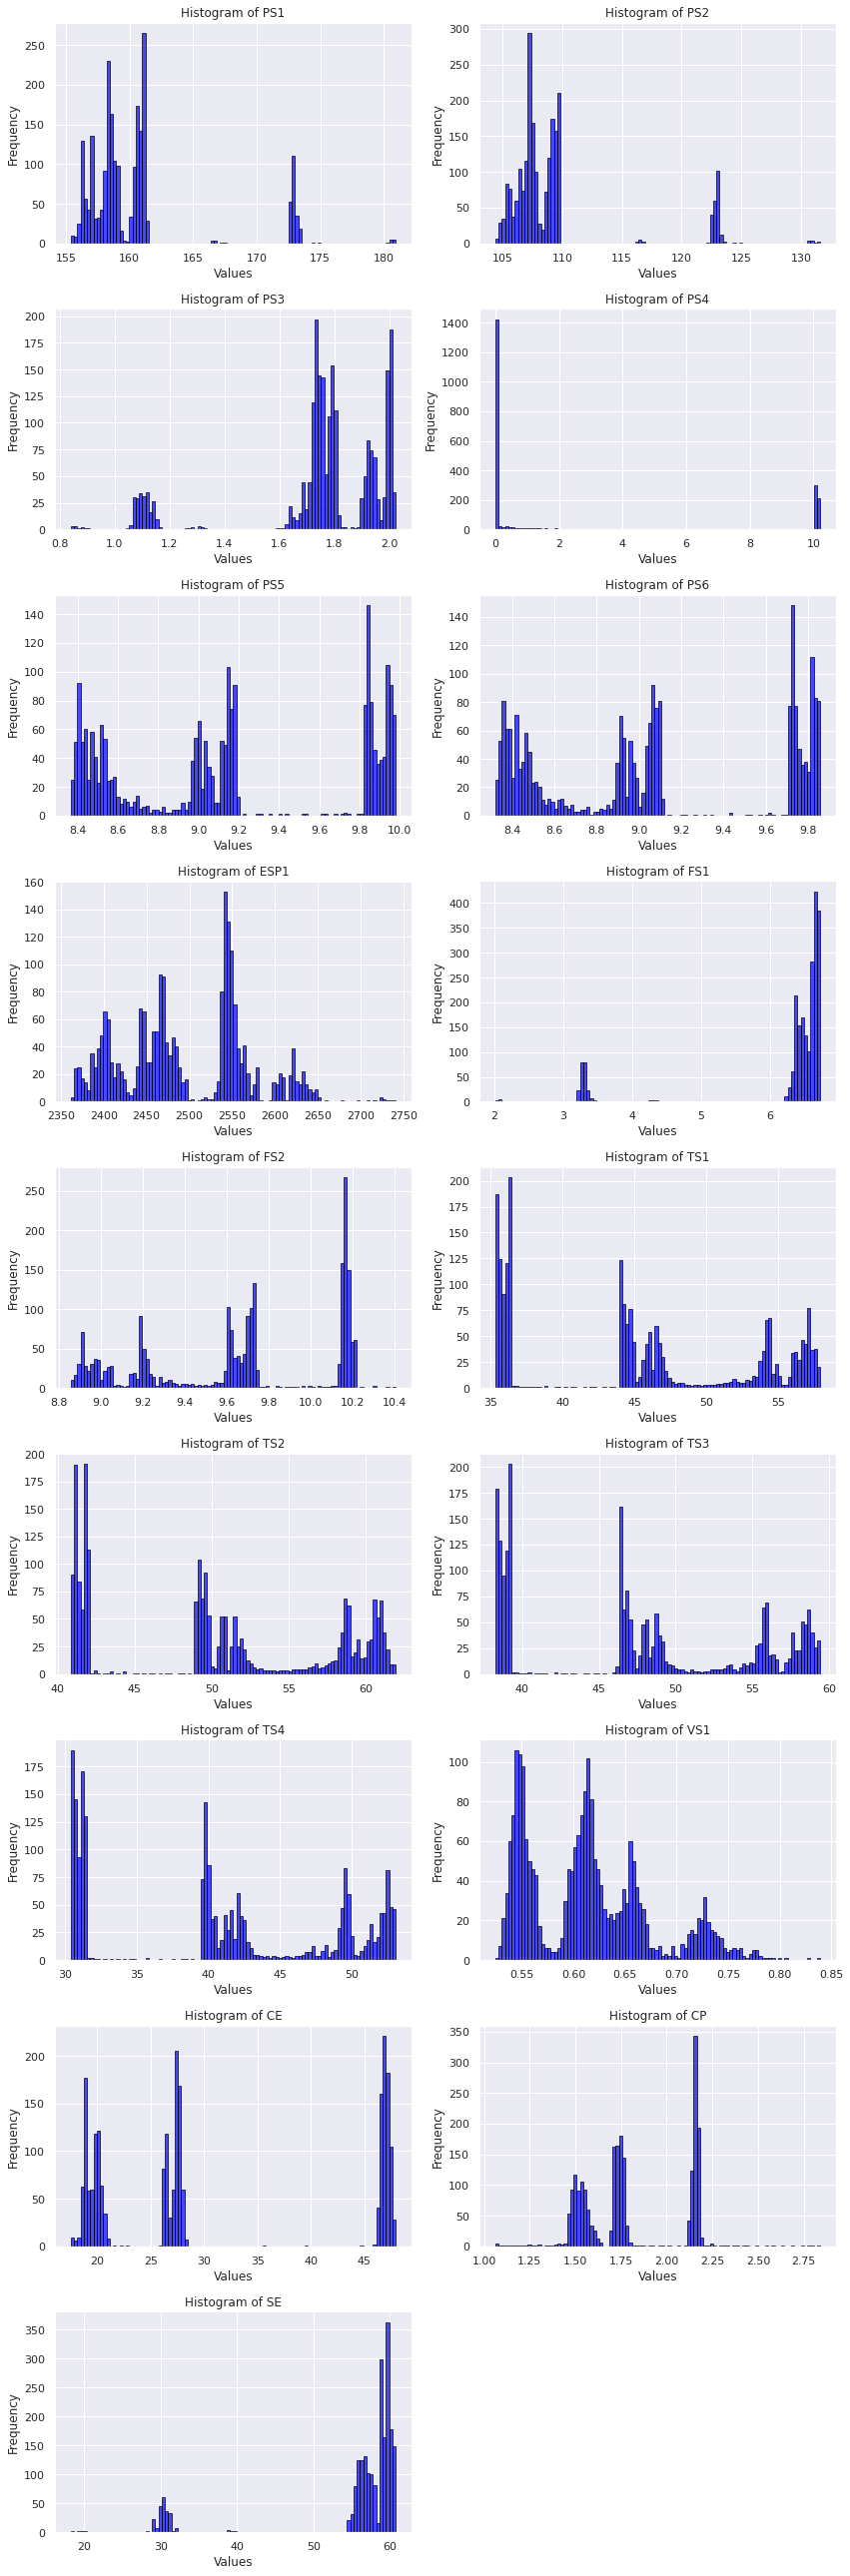

In [116]:
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histogram for each column
for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[column], bins=100, alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [94]:
df_final.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0


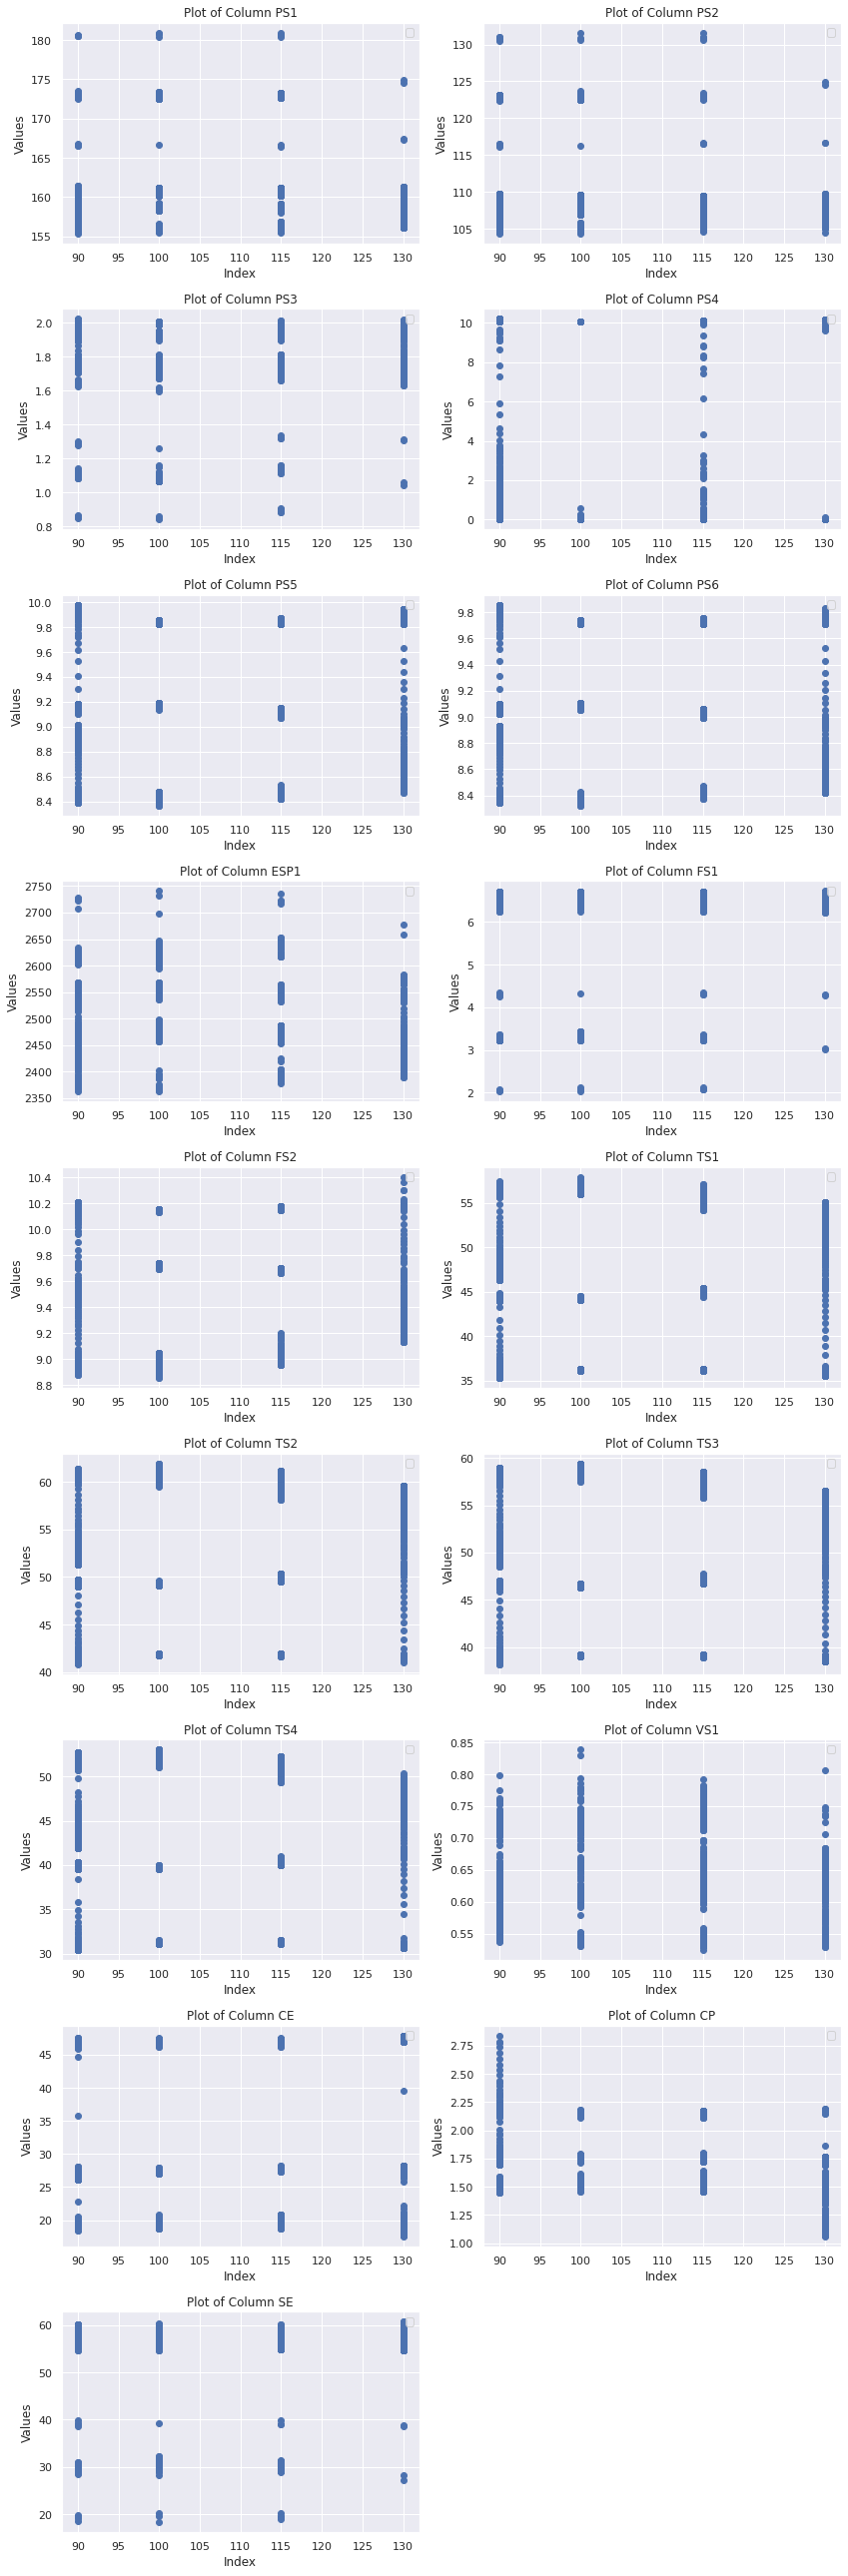

In [100]:
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))  # Adjust figure size

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot
for i, column in enumerate(df.columns):
    axes[i].scatter(df_final.Hydraulic_Accumulator, df[column])
    axes[i].set_title(f'Plot of Column {column}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Values')
    axes[i].legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

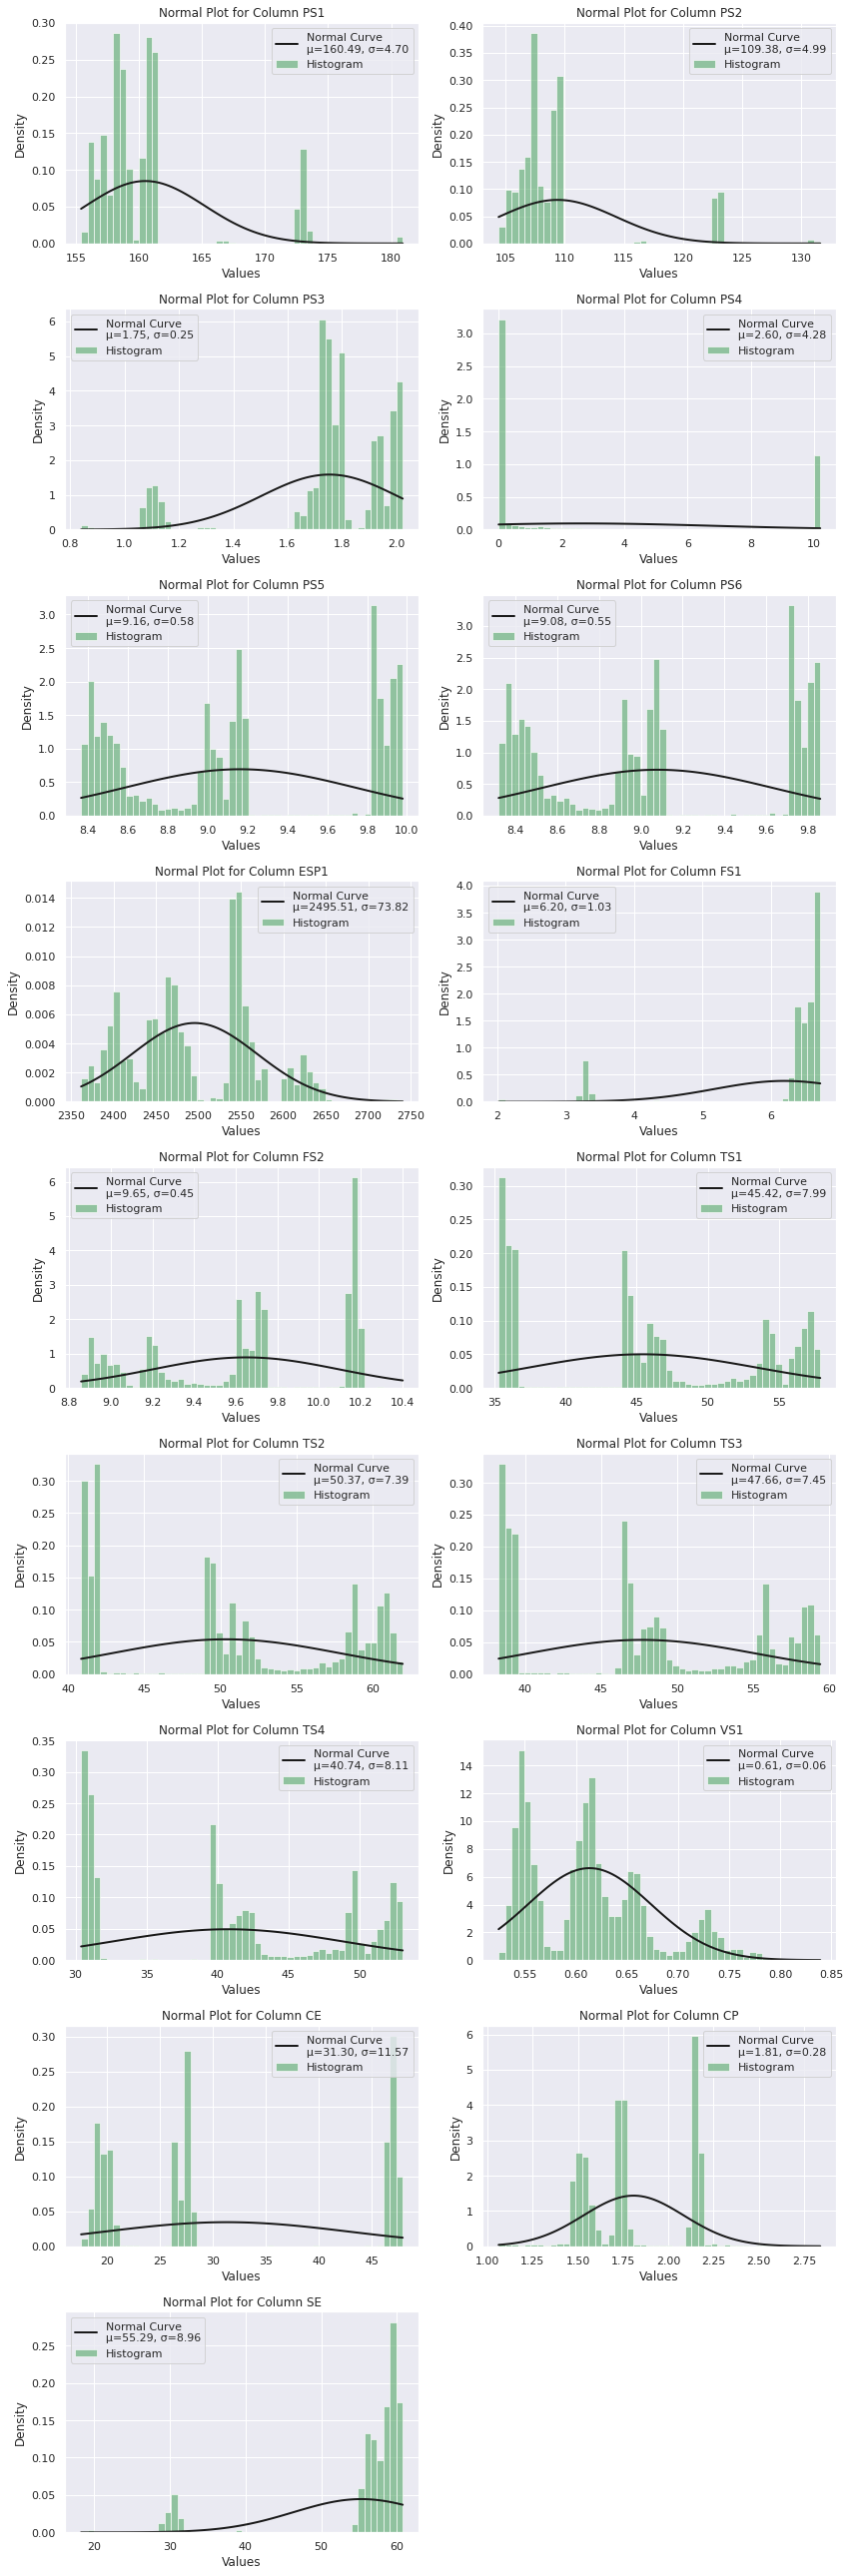

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set up subplots: 2 plots per row
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten axes for iteration
axes = axes.flatten()

# Plot histogram and normal distribution for each column
for i, column in enumerate(df.columns):
    ax = axes[i]
    
    # Data from the column
    col_data = df[column]
    
    # Plot histogram
    ax.hist(col_data, bins=50, density=True, alpha=0.6, color='g', label='Histogram')
    
    # Fit a normal distribution
    mu, std = norm.fit(col_data)
    
    # Plot the normal distribution curve
    x = np.linspace(col_data.min(), col_data.max(), 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label=f'Normal Curve\nμ={mu:.2f}, σ={std:.2f}')
    
    # Add titles and labels
    ax.set_title(f'Normal Plot for Column {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')
    ax.legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


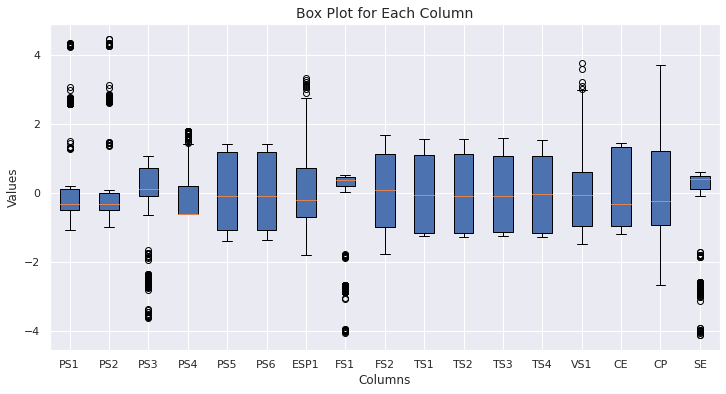

In [110]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.boxplot([df_sd[column] for column in df.columns], labels=df.columns, vert=True, patch_artist=True)

# Add titles and labels
plt.title('Box Plot for Each Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Show the plot
plt.show()

In [82]:
df_sd.corr()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
PS1,1.000000,0.995294,-0.719679,0.043416,-0.125801,-0.124423,0.831429,-0.924036,-0.224179,0.176661,0.148970,0.185098,0.171001,0.442242,-0.044862,-0.065850,-0.943953
PS2,0.995294,1.000000,-0.767557,-0.020001,-0.200835,-0.199468,0.787771,-0.946450,-0.295798,0.250480,0.223181,0.258669,0.245184,0.503126,-0.119934,-0.137819,-0.957972
PS3,-0.719679,-0.767557,1.000000,0.484111,0.755438,0.754532,-0.268738,0.921187,0.798910,-0.776377,-0.757500,-0.781094,-0.776001,-0.894019,0.697820,0.680701,0.884123
PS4,0.043416,-0.020001,0.484111,1.000000,0.744478,0.744778,0.457372,0.198654,0.688770,-0.706899,-0.709246,-0.704879,-0.718159,-0.661116,0.814459,0.752728,0.125883
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,-0.992940,-0.991391,-0.995100,-0.898647,0.973995,0.936972,0.377765
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,-0.992789,-0.991170,-0.994925,-0.898289,0.974220,0.937112,0.376471
ESP1,0.831429,0.787771,-0.268738,0.457372,0.418587,0.419764,1.000000,-0.608338,0.325387,-0.371933,-0.398269,-0.363958,-0.377500,-0.077260,0.475030,0.433904,-0.677823
FS1,-0.924036,-0.946450,0.921187,0.198654,0.461261,0.460014,-0.608338,1.000000,0.545412,-0.505347,-0.480062,-0.512708,-0.500738,-0.710475,0.376376,0.382178,0.994564
FS2,-0.224179,-0.295798,0.798910,0.688770,0.979715,0.979356,0.325387,0.545412,1.000000,-0.994654,-0.993142,-0.996281,-0.991432,-0.921744,0.919353,0.876955,0.466177
TS1,0.176661,0.250480,-0.776377,-0.706899,-0.992716,-0.992523,-0.371933,-0.505347,-0.994654,1.000000,0.999344,0.999732,0.999242,0.913102,-0.945977,-0.912048,-0.423296


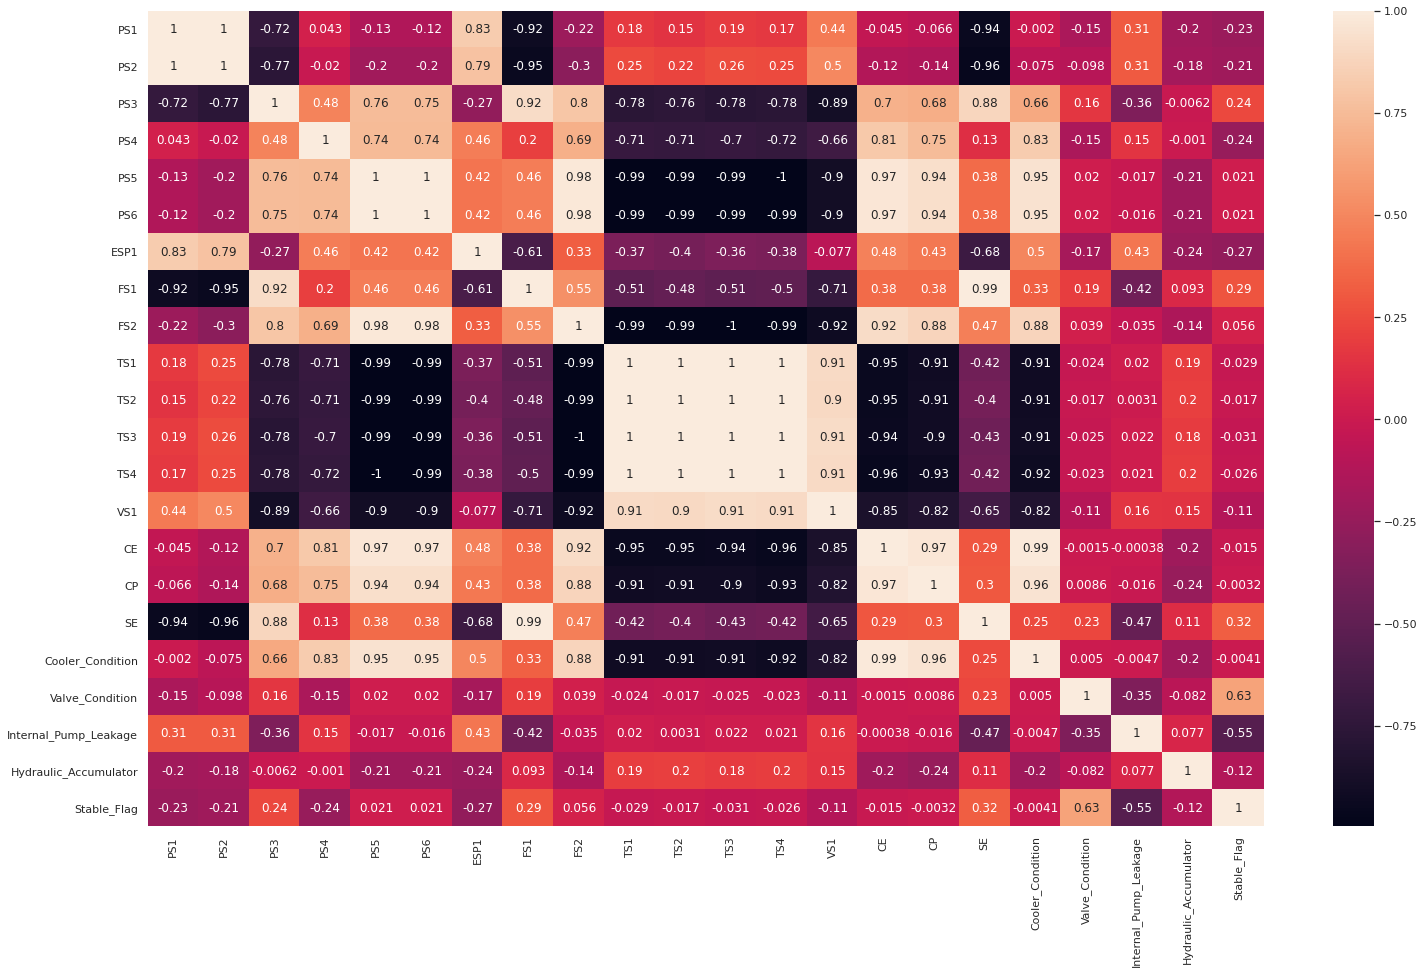

In [113]:
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

In [ ]:
# fig.savefig("corr.png")

In [ ]:
df_final_corr=df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr.head()

In [ ]:
df_final_corr_target=df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)

In [ ]:
df_final_corr_target

# 3- Data Preprocessing

In [ ]:
x=df_final.iloc[:,:-5]

In [ ]:
x.head(2)

In [ ]:
y=df_final.iloc[:,-5:]

In [ ]:
y.head(2)

In [ ]:
target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]
final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

In [ ]:
x.head()

## data splitting target-1

### target incidence

In [ ]:
round((target_1.value_counts(normalize=True)),4)    #cooler condition is normal

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,target_1,test_size=0.2,random_state=1)

## feature scaling target-1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)    target-1

## 1- logistic regression

In [ ]:
l_classifier=LogisticRegression(random_state=42)

In [ ]:
l_classifier.fit(train_x,train_y)

In [ ]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

### cross-validate

In [ ]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)        

## 2- knn

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10,p=2)

In [ ]:
knn.fit(train_x,train_y)

In [ ]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

### cross-validate

In [ ]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

## 3- SVC

In [ ]:
svc=SVC(kernel="rbf")

In [ ]:
svc.fit(train_x,train_y)

In [ ]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

### cross-validate

In [ ]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision_weighted"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

## 4- decision tree classifer

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [ ]:
dtc.fit(train_x,train_y)

In [ ]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) 

In [ ]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)     #overfitting

### cross-validate

In [ ]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

## 5- random forest classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [ ]:
rfc.fit(train_x,train_y)

In [ ]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [ ]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

### cross-validate

In [ ]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

## 6- tpotclassifier

In [ ]:
tpotc=TPOTClassifier(generations=20,population_size=50,scoring=["accuracy","precision"],cv=5,verbosity=2,n_jobs=-1,random_state=42,config_dict="TPOT light")

In [ ]:
tpotc.fit(train_x,train_y)

In [ ]:
tpotc.fitted_pipeline_

In [ ]:
pred_train_y=tpotc.predict(train_x)
pred_test_y=tpotc.predict(test_x)
accuracy_score_tpotc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_tpotc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_tpotc_train= ",accuracy_score_tpotc_train)
print("accuracy_score_tpotc_test= ",accuracy_score_tpotc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_tpotc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_tpotc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_tpotc_train= ",precision_score_tpotc_train)
print("precision_score_tpotc_test= ",precision_score_tpotc_test)

### cross validate

In [ ]:
scores=cross_validate(tpotc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=5)
scores

In [ ]:
print("tpot_accuracy_score_target1= ",scores["test_accuracy"].mean())
print("tpot_precision_score_target1= ",scores["test_precision_weighted"].mean())

## best model

In [ ]:
accuracy_score_tpotc_train=0.9994331065759637
accuracy_score_tpotc_test=1.0
precision_score_tpotc_train=0.9994340890602342
precision_score_tpotc_test=1.0

In [ ]:
pred_train_accuracy=[accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train
                     ,accuracy_score_tpotc_train]
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test
                     ,accuracy_score_tpotc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train
                     ,precision_score_tpotc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test
                     ,precision_score_tpotc_test]

In [ ]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [ ]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","tpotclassifier"],axis=0,inplace=True)
df_best_model

In [ ]:
print("logistic_regression_target1= ",max(df_best_model.accuracy.test))

In [ ]:
target1_pred_values=l_classifier.predict(test_x)

## data splitting target-2

### target incidence

In [ ]:
round((target_2.value_counts(normalize=True)),4)     # valve's condition is good

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,target_2,test_size=0.2,random_state=1)

## feature scaling target-2

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classifiers)     target-2

## 1- logistic regression

In [ ]:
l_classifier=LogisticRegression(random_state=42)

In [ ]:
l_classifier.fit(train_x,train_y)

In [ ]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

### cross-validate

In [ ]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)        

## 2- knn

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [ ]:
knn.fit(train_x,train_y)

In [ ]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

### cross-validate

In [ ]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

## 3- SVC

In [ ]:
svc=SVC(kernel="rbf")

In [ ]:
svc.fit(train_x,train_y)

In [ ]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)     # not accepted

In [ ]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

## 4- decision tree classifier

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [ ]:
dtc.fit(train_x,train_y)

In [ ]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [ ]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)     

### cross-validate

In [ ]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

## 5- random forest classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=50,random_state=1)

In [ ]:
rfc.fit(train_x,train_y)

In [ ]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [ ]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

### cross-validate

In [ ]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

## 6- tpotclassifier

In [ ]:
tpotc=TPOTClassifier(generations=20,population_size=50,scoring=["accuracy","precision"],cv=5,
                    random_state=2,verbosity=2,config_dict="TPOT light",n_jobs=-1)

In [ ]:
tpotc.fit(train_x,train_y)

In [ ]:
pred_train_y=tpotc.predict(train_x)
pred_test_y=tpotc.predict(test_x)
accuracy_score_tpotc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_tpotc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_tpotc_train= ",accuracy_score_tpotc_train)
print("accuracy_score_tpotc_test= ",accuracy_score_tpotc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_tpotc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_tpotc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_tpotc_train= ",precision_score_tpotc_train)
print("precision_score_tpotc_test= ",precision_score_tpotc_test)

## best model

In [ ]:
accuracy_score_tpotc_train= 0.9931972789115646
accuracy_score_tpotc_test=0.9841269841269841
precision_score_tpotc_train=0.9932222784708485
precision_score_tpotc_test=0.9841349279175272

In [ ]:
pred_train_accuracy=np.array([accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train
                     ,accuracy_score_dtc_train,accuracy_score_rfc_train,accuracy_score_tpotc_train])
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test
                     ,accuracy_score_dtc_test,accuracy_score_rfc_test,accuracy_score_tpotc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train
                   ,precision_score_dtc_train,precision_score_rfc_train,precision_score_tpotc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test
                     ,precision_score_dtc_test,precision_score_rfc_test,precision_score_tpotc_test]

In [ ]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [ ]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","decision_tree_cl","random_forest_cl","tpotclassifier"],axis=0,inplace=True)
df_best_model

In [ ]:
print("tpotclassifier(logisticregression)_target2= ",max(df_best_model.accuracy.test))

In [ ]:
target2_pred_values=tpotc.predict(test_x)

## data splitting target-3

### target incidence

In [ ]:
round((target_3.value_counts(normalize=True)),4)  #pump's condition is also good

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,target_3,test_size=0.2,random_state=1)

## feature scaling target-3

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)   target-3

## 1- logistic regression

In [ ]:
l_classifier=LogisticRegression(random_state=42)

In [ ]:
l_classifier.fit(train_x,train_y)

In [ ]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

### cross-validate

In [ ]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)

## 2- k-nearest neighbors

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10,p=2)

In [ ]:
knn.fit(train_x,train_y)

In [ ]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

### cross-validate

In [ ]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

## 3- SVC

In [ ]:
svc=SVC(kernel="rbf")

In [ ]:
svc.fit(train_x,train_y)

In [ ]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

### cross-validate

In [ ]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision_weighted"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

## 4- naive-bayes classifier

In [ ]:
nbc=GaussianNB()

In [ ]:
nbc.fit(train_x,train_y)

In [ ]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_nbc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_nbc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)     #not accepted

## best model 

In [ ]:
pred_train_accuracy=[accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train,accuracy_score_nbc_train
                     ]
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test,accuracy_score_nbc_test
                     ]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train,
                     precision_score_nbc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test,
                     precision_score_nbc_test]

In [ ]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])

In [ ]:
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [ ]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","naive_bayes"],axis=0,inplace=True)
df_best_model

In [ ]:
print("logistic_regression_target3= ",0.988918)

In [ ]:
target3_pred_values=l_classifier.predict(test_x)

## data splitting target-4

### target incidence

In [ ]:
round((target_4.value_counts(normalize=True)),4)     #hydraulic accumulator's condition is not good

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,target_4,test_size=0.2,random_state=1)

## feature scaling target-4

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)   target-4

## 1- logistic regression

In [ ]:
l_classifier=LogisticRegression(random_state=1)

In [ ]:
l_classifier.fit(train_x,train_y)

In [ ]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)       #not accepted

In [ ]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)       

## 2- knn

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [ ]:
knn.fit(train_x,train_y)

In [ ]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

### cross-validate

In [ ]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

## 3- SVC

In [ ]:
svc=SVC(kernel="rbf")

In [ ]:
svc.fit(train_x,train_y)

In [ ]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)      #not accepted

In [ ]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

## 4- naive bayes

In [ ]:
nbc=GaussianNB()

In [ ]:
nbc.fit(train_x,train_y)

In [ ]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)      #not accepted

In [ ]:
precision_score_nbc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_nbc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)     

## 5- decision tree classifier

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [ ]:
dtc.fit(train_x,train_y)

In [ ]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)    #overfitting

In [ ]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)    

### cross-validate

In [ ]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

## 6- random forest classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [ ]:
rfc.fit(train_x,train_y)

In [ ]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [ ]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

### cross-validate

In [ ]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

## best model

In [ ]:
pred_train_accuracy=np.array([accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train,accuracy_score_nbc_train
                     ,accuracy_score_dtc_train,accuracy_score_rfc_train])
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test,accuracy_score_nbc_test
                     ,accuracy_score_dtc_test,accuracy_score_rfc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train,
                     precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test,
                     precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]

In [ ]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [ ]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","naive_bayes","decision_tree_cl","random_forest_cl"],axis=0,inplace=True)
df_best_model

In [ ]:
print("knearestneighbors_target4= ",0.946064)

In [ ]:
target4_pred_values=knn.predict(test_x)

## data splitting final-target

In [ ]:
y_ind=y.iloc[:,:-1]
y_ind.head()

In [ ]:
final_target.head(2)

### target incidence

In [ ]:
final_target.value_counts(normalize=True)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(y_ind,final_target,test_size=0.2,random_state=1,stratify=final_target)

## feature scaling  final target

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification) final target

## 1- logistic regression

In [ ]:
l_classifier=LogisticRegression(random_state=1)

In [ ]:
l_classifier.fit(train_x,train_y)

In [ ]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_lr_train=precision_score(train_y,pred_train_y)
precision_score_lr_test=precision_score(test_y,pred_test_y)
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)       

In [ ]:
metrics.roc_auc_score(test_y,l_classifier.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(l_classifier,test_x,test_y)

### cross-validate

In [ ]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

In [ ]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)  

## 2- knn

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [ ]:
knn.fit(train_x,train_y)

In [ ]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_knn_train=precision_score(train_y,pred_train_y)
precision_score_knn_test=precision_score(test_y,pred_test_y)
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

### cross-validate

In [ ]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

In [ ]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

## 3- SVC

In [ ]:
svc=SVC(kernel="rbf",probability=True)

In [ ]:
svc.fit(train_x,train_y)

In [ ]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_svc_train=precision_score(train_y,pred_train_y)
precision_score_svc_test=precision_score(test_y,pred_test_y)
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

In [ ]:
metrics.roc_auc_score(test_y,svc.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(svc,test_x,test_y)

### cross-validate

In [ ]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

In [ ]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

## 4- naive bayes

In [ ]:
nbc=GaussianNB()

In [ ]:
nbc.fit(train_x,train_y)

In [ ]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)    

In [ ]:
precision_score_nbc_train=precision_score(train_y,pred_train_y)
precision_score_nbc_test=precision_score(test_y,pred_test_y)
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)     

## 5- decision tree classifier

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [ ]:
dtc.fit(train_x,train_y)

In [ ]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)  

In [ ]:
precision_score_dtc_train=precision_score(train_y,pred_train_y)
precision_score_dtc_test=precision_score(test_y,pred_test_y)
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)    

In [ ]:
metrics.roc_auc_score(test_y,dtc.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(dtc,test_x,test_y)

### cross-validate

In [ ]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

In [ ]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

## 6- random forest classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [ ]:
rfc.fit(train_x,train_y)

In [ ]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [ ]:
precision_score_rfc_train=precision_score(train_y,pred_train_y)
precision_score_rfc_test=precision_score(test_y,pred_test_y)
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

In [ ]:
metrics.roc_auc_score(test_y,rfc.predict_proba(test_x)[:,1])

In [ ]:
metrics.roc_auc_score(train_y,rfc.predict_proba(train_x)[:,1])

In [ ]:
metrics.plot_roc_curve(rfc,test_x,test_y)

### cross-validate

In [ ]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

In [ ]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

## best model

In [ ]:
print("random_forest_classifier_roc_auc_score= ",round(0.9689312628453983,4))

# Final_data for testing with final_target

In [ ]:
df_final_data_testing_final_target=pd.DataFrame({"Cooler_Condition":target1_pred_values,"Valve_Condition":target2_pred_values
                                                 ,"Internal_Pump_Leakage":target3_pred_values,"Hydraulic_Accumulator":target4_pred_values})

In [ ]:
df_final_data_testing_final_target.head()

# Final Results Of Stable Flag 

In [ ]:
df_final_data_testing_final_target.head()

In [ ]:
df_final_data_testing_final_target.var()

In [ ]:
std_final_data_testing_final_target=StandardScaler().fit_transform(df_final_data_testing_final_target)
std_final_data_testing_final_target

In [ ]:
pred_values_per_minute=rfc.predict(std_final_data_testing_final_target)
pred_values_per_minute

In [ ]:
np.sum(pred_values_per_minute==0)/len(test_x)

In [ ]:
np.sum(pred_values_per_minute==1)/len(test_x)

# Models for predicting machine failure before 15 minutes

## data analysis

In [ ]:
df_final.head()

In [ ]:
len(df_final)

In [ ]:
2205/15

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
y_15=y.iloc[:,:-1]

In [ ]:
y_15=y_15.iloc[14:,:]
y_15

In [ ]:
y_15=y_15.set_axis(range(2191),axis=0)
y_15.head()

In [ ]:
len(y_15)

In [ ]:
x_15=x.iloc[:-14,:]
x_15

In [ ]:
x_15=x_15.set_axis(range(2191),axis=0)
x_15.head()

In [ ]:
df_final_15=pd.concat([x_15,y_15],axis=1)
df_final_15.head()

In [ ]:
len(df_final_15)

In [ ]:
(((y.iloc[:,-1]).iloc[14:]).set_axis(range(2191),axis=0)).astype(int)

In [ ]:
target_15_1=df_final_15.iloc[:,-4]
target_15_2=df_final_15.iloc[:,-3]
target_15_3=df_final_15.iloc[:,-2]
target_15_4=df_final_15.iloc[:,-1]
final_target_15=(((y.iloc[:,-1]).iloc[14:]).set_axis(range(2191),axis=0)).astype(int)

In [ ]:
final_target_15

In [ ]:
fig=plt.gcf()
fig.set_size_inches((35,15))
sns.heatmap(df_final_15.corr(),annot=True)

In [ ]:
# fig.savefig("corr_15.png")

In [ ]:
class Singleclass_Classification_Models:
    def __init__(self,train_x,test_x,train_y,test_y):
        self.train_x=train_x
        self.test_x=test_x
        self.train_y=train_y
        self.test_y=test_y
    
    def logistic_regression(self):
        global accuracy_score_log_reg_train,accuracy_score_log_reg_test,precision_score_log_reg_train,precision_score_log_reg_test,recall_score_log_reg_train,recall_score_log_reg_test
        log_reg=LogisticRegression(random_state=42)
        log_reg.fit(self.train_x,self.train_y)
        pred_train_y=log_reg.predict(self.train_x)
        pred_test_y=log_reg.predict(self.test_x)
    
        # accuracy_score
        accuracy_score_log_reg_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_log_reg_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_log_reg_train= ",accuracy_score_log_reg_train)
        print("accuracy_score_log_reg_test= ",accuracy_score_log_reg_test)
        print("\n")
        
        # precision-score
        precision_score_log_reg_train=precision_score(self.train_y,pred_train_y)
        precision_score_log_reg_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_log_reg_train= ",precision_score_log_reg_train)
        print("precision_score_log_reg_test= ",precision_score_log_reg_test)  
        print("\n")
        
        # recall-score
        recall_score_log_reg_train=recall_score(self.train_y,pred_train_y)
        recall_score_log_reg_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_log_reg_train= ",recall_score_log_reg_train)
        print("recall_score_log_reg_test= ",recall_score_log_reg_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(log_reg,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_log_reg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_log_reg_cross= ",accuracy_score_log_reg_cross)
        precision_score_log_reg_cross=scores["test_precision"].mean()
        print("precision_score_log_reg_cross= ",precision_score_log_reg_cross)
        recall_score_log_reg_cross=scores["test_recall"].mean()
        print("recall_score_log_reg_cross= ",recall_score_log_reg_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
      
    def knearestneighbors(self):
        global accuracy_score_kn_neighbors_train,accuracy_score_kn_neighbors_test,precision_score_kn_neighbors_train,precision_score_kn_neighbors_test,recall_score_kn_neighbors_train,recall_score_kn_neighbors_test
        kn_neighbors=KNeighborsClassifier(n_neighbors=7,p=2)
        kn_neighbors.fit(self.train_x,self.train_y)
        pred_train_y=kn_neighbors.predict(self.train_x)
        pred_test_y=kn_neighbors.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_kn_neighbors_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_kn_neighbors_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_kn_neighbors_train= ",accuracy_score_kn_neighbors_train)
        print("accuracy_score_kn_neighbors_test= ",accuracy_score_kn_neighbors_test)
        print("\n")
        
        # precision-score
        precision_score_kn_neighbors_train=precision_score(self.train_y,pred_train_y)
        precision_score_kn_neighbors_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_kn_neighbors_train= ",precision_score_kn_neighbors_train)
        print("precision_score_kn_neighbors_test= ",precision_score_kn_neighbors_test) 
        print("\n")
        
        # recall-score
        recall_score_kn_neighbors_train=recall_score(self.train_y,pred_train_y)
        recall_score_kn_neighbors_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_kn_neighbors_train= ",recall_score_kn_neighbors_train)
        print("recall_score_kn_neighbors_test= ",recall_score_kn_neighbors_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(kn_neighbors,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_kn_neighbors_cross=scores["test_accuracy"].mean()
        print("accuracy_score_kn_neighbors_cross= ",accuracy_score_kn_neighbors_cross)
        precision_score_kn_neighbors_cross=scores["test_precision"].mean()
        print("precision_score_kn_neighbors_cross= ",precision_score_kn_neighbors_cross)
        recall_score_kn_neighbors_cross=scores["test_recall"].mean()
        print("recall_score_kn_neighbors_cross= ",recall_score_kn_neighbors_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def Svc(self):
        global accuracy_score_svc_train,accuracy_score_svc_test,precision_score_svc_train,precision_score_svc_test,recall_score_svc_train,recall_score_svc_test
        svc=SVC(kernel="rbf")
        svc.fit(self.train_x,self.train_y)
        pred_train_y=svc.predict(self.train_x)
        pred_test_y=svc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_svc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_svc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_svc_train= ",accuracy_score_svc_train)
        print("accuracy_score_svc_test= ",accuracy_score_svc_test)
        print("\n")
        
        # precision-score
        precision_score_svc_train=precision_score(self.train_y,pred_train_y)
        precision_score_svc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_svc_train= ",precision_score_svc_train)
        print("precision_score_svc_test= ",precision_score_svc_test) 
        print("\n")
        
        # recall-score
        recall_score_svc_train=recall_score(self.train_y,pred_train_y)
        recall_score_svc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_svc_train= ",recall_score_svc_train)
        print("recall_score_svc_test= ",recall_score_svc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(svc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def naive_bayes(self):
        global accuracy_score_nbc_train,accuracy_score_nbc_test,precision_score_nbc_train,precision_score_nbc_test,recall_score_nbc_train,recall_score_nbc_test
        nbc=GaussianNB()
        nbc.fit(train_x,train_y)
        pred_train_y=nbc.predict(self.train_x)
        pred_test_y=nbc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_nbc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_nbc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
        print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
        print("\n")
        
        # precision-score
        precision_score_nbc_train=precision_score(self.train_y,pred_train_y)
        precision_score_nbc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_nbc_train= ",precision_score_nbc_train)
        print("precision_score_nbc_test= ",precision_score_nbc_test)
        print("\n")
        
        # recall-score
        recall_score_nbc_train=recall_score(self.train_y,pred_train_y)
        recall_score_nbc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_nbc_train= ",recall_score_nbc_train)
        print("recall_score_nbc_test= ",recall_score_nbc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(nbc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_nbc_cross= ",accuracy_score_nbc_cross)
        precision_score_nbc_cross=scores["test_precision"].mean()
        print("precision_score_nbc_cross= ",precision_score_nbc_cross)
        recall_score_nbc_cross=scores["test_recall"].mean()
        print("recall_score_nbc_cross= ",recall_score_nbc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)   
        print("\n")
        
    def decision_tree(self):
        global accuracy_score_dtc_train,accuracy_score_dtc_test,precision_score_dtc_train,precision_score_dtc_test,recall_score_dtc_train,recall_score_dtc_test
        dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
        dtc.fit(train_x,train_y)
        pred_train_y=dtc.predict(self.train_x)
        pred_test_y=dtc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_dtc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_dtc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
        print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
        print("\n")
        
        # precision-score
        precision_score_dtc_train=precision_score(self.train_y,pred_train_y)
        precision_score_dtc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_dtc_train= ",precision_score_dtc_train)
        print("precision_score_dtc_test= ",precision_score_dtc_test)
        print("\n")
        
        # recall-score
        recall_score_dtc_train=recall_score(self.train_y,pred_train_y)
        recall_score_dtc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_dtc_train= ",recall_score_dtc_train)
        print("recall_score_dtc_test= ",recall_score_dtc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(dtc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
        precision_score_dtc_cross=scores["test_precision"].mean()
        print("precision_score_dtc_cross= ",precision_score_dtc_cross)
        recall_score_dtc_cross=scores["test_recall"].mean()
        print("recall_score_dtc_cross= ",recall_score_dtc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)      
        print("\n")
        
    def random_forest(self):
        global accuracy_score_rfc_train,accuracy_score_rfc_test,precision_score_rfc_train,precision_score_rfc_test,recall_score_rfc_train,recall_score_rfc_test
        rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        rfc.fit(train_x,train_y)
        pred_train_y=rfc.predict(self.train_x)
        pred_test_y=rfc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_rfc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_rfc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
        print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
        print("\n")
        
        # precision-score
        precision_score_rfc_train=precision_score(self.train_y,pred_train_y)
        precision_score_rfc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_rfc_train= ",precision_score_rfc_train)
        print("precision_score_rfc_test= ",precision_score_rfc_test)
        print("\n")
        
        # recall-score
        recall_score_rfc_train=recall_score(self.train_y,pred_train_y)
        recall_score_rfc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_rfc_train= ",recall_score_rfc_train)
        print("recall_score_rfc_test= ",recall_score_rfc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(rfc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_rfc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
        precision_score_rfc_cross=scores["test_precision"].mean()
        print("precision_score_rfc_cross= ",precision_score_rfc_cross)
        recall_score_rfc_cross=scores["test_recall"].mean()
        print("recall_score_rfc_cross= ",recall_score_rfc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
    
    def best_model(self):
        pred_train_accuracy=[accuracy_score_log_reg_train,accuracy_score_kn_neighbors_train,accuracy_score_svc_train
                     ,accuracy_score_nbc_train,accuracy_score_dtc_train,accuracy_score_rfc_train]
        pred_test_accuracy=[accuracy_score_log_reg_test,accuracy_score_kn_neighbors_test,accuracy_score_svc_test
                             ,accuracy_score_nbc_test,accuracy_score_dtc_test,accuracy_score_rfc_test]
        pred_train_precision=[precision_score_log_reg_train,precision_score_kn_neighbors_train,precision_score_svc_train
                            ,precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
        pred_test_precision=[precision_score_log_reg_test,precision_score_kn_neighbors_test,precision_score_svc_test
                             ,precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]
        pred_train_recall=[recall_score_log_reg_train,recall_score_kn_neighbors_train,recall_score_svc_train,recall_score_nbc_train
                          ,recall_score_dtc_train,recall_score_rfc_train]
        pred_test_recall=[recall_score_log_reg_test,recall_score_kn_neighbors_test,recall_score_svc_test,recall_score_nbc_test
                         ,recall_score_dtc_test,recall_score_rfc_test]

        df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
        df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
        
        df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
        df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])
        
        df_train_recall=pd.DataFrame(pred_train_recall,columns=["train"])
        df_test_recall=pd.DataFrame(pred_test_recall,columns=["test"])
        
        df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
        df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
        df_recall=pd.concat([df_train_recall,df_test_recall],axis=1)
        df_best_model=pd.concat([df_accuracy,df_precision,df_recall],keys=["accuracy","precision","recall"],axis=1)
        df_best_model.set_axis(["logistic_reg_cl","knn_cl","sv_cl","naive-bayes_cl","decision_tree_cl","random_forest_cl"],axis=0,inplace=True)
        return df_best_model

In [ ]:
class Multiclass_Classification_Models:
    def __init__(self,train_x,test_x,train_y,test_y):
        self.train_x=train_x
        self.test_x=test_x
        self.train_y=train_y
        self.test_y=test_y
    
    def logistic_regression(self):
        global accuracy_score_log_reg_train,accuracy_score_log_reg_test,precision_score_log_reg_train,precision_score_log_reg_test,recall_score_log_reg_train,recall_score_log_reg_test
        log_reg=LogisticRegression(random_state=42)
        log_reg.fit(self.train_x,self.train_y)
        pred_train_y=log_reg.predict(self.train_x)
        pred_test_y=log_reg.predict(self.test_x)
    
        # accuracy_score
        accuracy_score_log_reg_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_log_reg_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_log_reg_train= ",accuracy_score_log_reg_train)
        print("accuracy_score_log_reg_test= ",accuracy_score_log_reg_test)
        print("\n")
        
        # precision-score
        precision_score_log_reg_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_log_reg_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_log_reg_train= ",precision_score_log_reg_train)
        print("precision_score_log_reg_test= ",precision_score_log_reg_test)  
        print("\n")
        
        # recall-score
        recall_score_log_reg_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_log_reg_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_log_reg_train= ",recall_score_log_reg_train)
        print("recall_score_log_reg_test= ",recall_score_log_reg_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(log_reg,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_log_reg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_log_reg_cross= ",accuracy_score_log_reg_cross)
        precision_score_log_reg_cross=scores["test_precision_weighted"].mean()
        print("precision_score_log_reg_cross= ",precision_score_log_reg_cross)
        recall_score_log_reg_cross=scores["test_recall_weighted"].mean()
        print("recall_score_log_reg_cross= ",recall_score_log_reg_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
      
    def knearestneighbors(self):
        global accuracy_score_kn_neighbors_train,accuracy_score_kn_neighbors_test,precision_score_kn_neighbors_train,precision_score_kn_neighbors_test,recall_score_kn_neighbors_train,recall_score_kn_neighbors_test
        kn_neighbors=KNeighborsClassifier(n_neighbors=7,p=2)
        kn_neighbors.fit(self.train_x,self.train_y)
        pred_train_y=kn_neighbors.predict(self.train_x)
        pred_test_y=kn_neighbors.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_kn_neighbors_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_kn_neighbors_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_kn_neighbors_train= ",accuracy_score_kn_neighbors_train)
        print("accuracy_score_kn_neighbors_test= ",accuracy_score_kn_neighbors_test)
        print("\n")
        
        # precision-score
        precision_score_kn_neighbors_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_kn_neighbors_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_kn_neighbors_train= ",precision_score_kn_neighbors_train)
        print("precision_score_kn_neighbors_test= ",precision_score_kn_neighbors_test) 
        print("\n")
        
        # recall-score
        recall_score_kn_neighbors_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_kn_neighbors_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_kn_neighbors_train= ",recall_score_kn_neighbors_train)
        print("recall_score_kn_neighbors_test= ",recall_score_kn_neighbors_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(kn_neighbors,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_kn_neighbors_cross=scores["test_accuracy"].mean()
        print("accuracy_score_kn_neighbors_cross= ",accuracy_score_kn_neighbors_cross)
        precision_score_kn_neighbors_cross=scores["test_precision_weighted"].mean()
        print("precision_score_kn_neighbors_cross= ",precision_score_kn_neighbors_cross)
        recall_score_kn_neighbors_cross=scores["test_recall_weighted"].mean()
        print("recall_score_kn_neighbors_cross= ",recall_score_kn_neighbors_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def Svc(self):
        global accuracy_score_svc_train,accuracy_score_svc_test,precision_score_svc_train,precision_score_svc_test,recall_score_svc_train,recall_score_svc_test
        svc=SVC(kernel="rbf")
        svc.fit(self.train_x,self.train_y)
        pred_train_y=svc.predict(self.train_x)
        pred_test_y=svc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_svc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_svc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_svc_train= ",accuracy_score_svc_train)
        print("accuracy_score_svc_test= ",accuracy_score_svc_test)
        print("\n")
        
        # precision-score
        precision_score_svc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_svc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_svc_train= ",precision_score_svc_train)
        print("precision_score_svc_test= ",precision_score_svc_test) 
        print("\n")
        
        # recall-score
        recall_score_svc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_svc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_svc_train= ",recall_score_svc_train)
        print("recall_score_svc_test= ",recall_score_svc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(svc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def naive_bayes(self):
        global accuracy_score_nbc_train,accuracy_score_nbc_test,precision_score_nbc_train,precision_score_nbc_test,recall_score_nbc_train,recall_score_nbc_test
        nbc=GaussianNB()
        nbc.fit(train_x,train_y)
        pred_train_y=nbc.predict(self.train_x)
        pred_test_y=nbc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_nbc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_nbc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
        print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
        print("\n")
        
        # precision-score
        precision_score_nbc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_nbc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_nbc_train= ",precision_score_nbc_train)
        print("precision_score_nbc_test= ",precision_score_nbc_test)
        print("\n")
        
        # recall-score
        recall_score_nbc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_nbc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_nbc_train= ",recall_score_nbc_train)
        print("recall_score_nbc_test= ",recall_score_nbc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(nbc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_nbc_cross= ",accuracy_score_nbc_cross)
        precision_score_nbc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_nbc_cross= ",precision_score_nbc_cross)
        recall_score_nbc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_nbc_cross= ",recall_score_nbc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)   
        print("\n")
        
    def decision_tree(self):
        global accuracy_score_dtc_train,accuracy_score_dtc_test,precision_score_dtc_train,precision_score_dtc_test,recall_score_dtc_train,recall_score_dtc_test
        dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
        dtc.fit(train_x,train_y)
        pred_train_y=dtc.predict(self.train_x)
        pred_test_y=dtc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_dtc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_dtc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
        print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
        print("\n")
        
        # precision-score
        precision_score_dtc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_dtc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_dtc_train= ",precision_score_dtc_train)
        print("precision_score_dtc_test= ",precision_score_dtc_test)
        print("\n")
        
        # recall-score
        recall_score_dtc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_dtc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_dtc_train= ",recall_score_dtc_train)
        print("recall_score_dtc_test= ",recall_score_dtc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(dtc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
        precision_score_dtc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_dtc_cross= ",precision_score_dtc_cross)
        recall_score_dtc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_dtc_cross= ",recall_score_dtc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)      
        print("\n")
        
    def random_forest(self):
        global accuracy_score_rfc_train,accuracy_score_rfc_test,precision_score_rfc_train,precision_score_rfc_test,recall_score_rfc_train,recall_score_rfc_test
        rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        rfc.fit(train_x,train_y)
        pred_train_y=rfc.predict(self.train_x)
        pred_test_y=rfc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_rfc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_rfc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
        print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
        print("\n")
        
        # precision-score
        precision_score_rfc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_rfc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_rfc_train= ",precision_score_rfc_train)
        print("precision_score_rfc_test= ",precision_score_rfc_test)
        print("\n")
        
        # recall-score
        recall_score_rfc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_rfc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_rfc_train= ",recall_score_rfc_train)
        print("recall_score_rfc_test= ",recall_score_rfc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(rfc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_rfc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
        precision_score_rfc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_rfc_cross= ",precision_score_rfc_cross)
        recall_score_rfc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_rfc_cross= ",recall_score_rfc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
    
    def best_model(self):
        pred_train_accuracy=[accuracy_score_log_reg_train,accuracy_score_kn_neighbors_train,accuracy_score_svc_train
                     ,accuracy_score_nbc_train,accuracy_score_dtc_train,accuracy_score_rfc_train]
        pred_test_accuracy=[accuracy_score_log_reg_test,accuracy_score_kn_neighbors_test,accuracy_score_svc_test
                             ,accuracy_score_nbc_test,accuracy_score_dtc_test,accuracy_score_rfc_test]
        pred_train_precision=[precision_score_log_reg_train,precision_score_kn_neighbors_train,precision_score_svc_train
                            ,precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
        pred_test_precision=[precision_score_log_reg_test,precision_score_kn_neighbors_test,precision_score_svc_test
                             ,precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]
        pred_train_recall=[recall_score_log_reg_train,recall_score_kn_neighbors_train,recall_score_svc_train,recall_score_nbc_train
                          ,recall_score_dtc_train,recall_score_rfc_train]
        pred_test_recall=[recall_score_log_reg_test,recall_score_kn_neighbors_test,recall_score_svc_test,recall_score_nbc_test
                         ,recall_score_dtc_test,recall_score_rfc_test]

        df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
        df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
        
        df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
        df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])
        
        df_train_recall=pd.DataFrame(pred_train_recall,columns=["train"])
        df_test_recall=pd.DataFrame(pred_test_recall,columns=["test"])
        
        df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
        df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
        df_recall=pd.concat([df_train_recall,df_test_recall],axis=1)
        df_best_model=pd.concat([df_accuracy,df_precision,df_recall],keys=["accuracy","precision","recall"],axis=1)
        df_best_model.set_axis(["logistic_reg_cl","knn_cl","sv_cl","naive-bayes_cl","decision_tree_cl","random_forest_cl"],axis=0,inplace=True)
        return df_best_model

## data splitting    target-1

### target incidence

In [ ]:
round((target_15_1.value_counts(normalize=True)),4)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_1,test_size=0.2,random_state=1)

## feature scaling target-1

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-1

In [ ]:
all_models1=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

In [ ]:
all_models1.logistic_regression()

## 2- knn

In [ ]:
all_models1.knearestneighbors()

## 3- SVC

In [ ]:
all_models1.Svc()

## 4- naive-bayes

In [ ]:
all_models1.naive_bayes()

## 5- decision tree classifier

In [ ]:
all_models1.decision_tree()    #overfitting

## 6- random forest classifier

In [ ]:
all_models1.random_forest()    #overfitting

## best model

In [ ]:
all_models1.best_model()

In [ ]:
print("logistic_regression= ",round(0.986471,4))

In [ ]:
l_classifier=LogisticRegression(random_state=42)
l_classifier.fit(train_x,train_y)
pred_test_y=l_classifier.predict(test_x)

In [ ]:
target1_15_pred_values=pred_test_y

## data splitting target-2

### target incidence

In [ ]:
round((target_15_2.value_counts(normalize=True)),4)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_2,test_size=0.2,random_state=1)

## feature scaling  target-2

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-2

In [ ]:
all_models2=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic_regression

In [ ]:
all_models2.logistic_regression()    # not accepted

## 2- knn

In [ ]:
all_models2.knearestneighbors()         #not accepted

## 3- SVC

In [ ]:
all_models2.Svc()      #not accepted

## 4- naive-bayes

In [ ]:
all_models2.naive_bayes()     #not accepted

## 5- decision tree classifier

In [ ]:
all_models2.decision_tree()     

## 6- random forest classifier

In [ ]:
all_models2.random_forest()      

## best model

In [ ]:
all_models2.best_model()

In [ ]:
print("random_forest_classifier= ",round(0.787609,4))

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(train_x,train_y)
pred_test_y=rfc.predict(test_x)

In [ ]:
target2_15_pred_values=pred_test_y

## data splitting   target-3

### target incidence

In [ ]:
target_15_3=target_15_3.astype(int)
target_15_3

In [ ]:
round((target_15_3.value_counts(normalize=True)),4)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_3,test_size=0.2,random_state=1)

## feature scaling  target-3

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-3 

In [ ]:
all_models3=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

In [ ]:
all_models3.logistic_regression()

## 2- knn

In [ ]:
all_models3.knearestneighbors()

## 3- SVC

In [ ]:
all_models3.Svc()       

## 4- naive-bayes

In [ ]:
all_models3.naive_bayes()

## 5- decision tree classifier

In [ ]:
all_models3.decision_tree()

## 6- random forest classifier

In [ ]:
all_models3.random_forest()

## best_model

In [ ]:
all_models3.best_model()

In [ ]:
print("knn= ",round(0.846353,4))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

In [ ]:
pred_test_y=knn.predict(test_x)

In [ ]:
target3_15_pred_values=pred_test_y

## data splitting  target-4

### target incidence

In [ ]:
round((target_15_4.value_counts(normalize=True)),4)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_4,test_size=0.2,random_state=1)

## feature  scaling

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-4

In [ ]:
all_models4=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic_regression

In [ ]:
all_models4.logistic_regression()

## 2- knn

In [ ]:
all_models4.knearestneighbors()

## 3- SVC

In [ ]:
all_models4.Svc()

## 4- naive-bayes

In [ ]:
all_models4.naive_bayes()          #not accepted

## 5- decision tree classifier

In [ ]:
all_models4.decision_tree()

## 6- random forest classifier

In [ ]:
all_models4.random_forest()

## best_model

In [ ]:
all_models4.best_model()

In [ ]:
print("knn= ",round(0.927738,4))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

In [ ]:
pred_test_y=knn.predict(test_x)

In [ ]:
target4_15_pred_values=pred_test_y

## data splitting   final_target15

### target incidence

In [ ]:
final_target_15.value_counts(normalize=True)

In [ ]:
y_15_ind=y_15
y_15_ind

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(y_15_ind,final_target_15,test_size=0.2,random_state=1,stratify=final_target_15)

## feature scaling  final_target15

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# models

In [ ]:
all_models5=Singleclass_Classification_Models(train_x,test_x,train_y,test_y)

## logistic_regression

In [ ]:
all_models5.logistic_regression()

In [ ]:
l_classifier=LogisticRegression(random_state=1)
l_classifier.fit(train_x,train_y)

In [ ]:
metrics.roc_auc_score(test_y,l_classifier.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(l_classifier,test_x,test_y)

## knn

In [ ]:
all_models5.knearestneighbors()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

In [ ]:
metrics.roc_auc_score(test_y,knn.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(knn,test_x,test_y)

## SVC

In [ ]:
all_models5.Svc()      

In [ ]:
svc=SVC(kernel="linear",probability=True)
svc.fit(train_x,train_y)

In [ ]:
metrics.roc_auc_score(test_y,svc.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(svc,test_x,test_y)

## naive-bayes

In [ ]:
all_models5.naive_bayes()

## decision tree classifier

In [ ]:
all_models5.decision_tree()

## random forest classifier

In [ ]:
all_models5.random_forest()

## best model

In [ ]:
all_models5.best_model()

In [ ]:
print("knearestneighbors_cl= ",round(0.903448,4))

# Final_data for testing with final_target15

In [ ]:
df_final_data_testing_final_target15=pd.DataFrame({"Cooler_Condition":target1_15_pred_values,"Valve_Condition":target2_15_pred_values
                                                 ,"Internal_Pump_Leakage":target3_15_pred_values,"Hydraulic_Accumulator":target4_15_pred_values})

In [ ]:
df_final_data_testing_final_target15.head()

# Final Results Of Stable Flag

In [ ]:
df_final_data_testing_final_target15.var()

In [ ]:
std_final_data_testing_final_target15=StandardScaler().fit_transform(df_final_data_testing_final_target15)
std_final_data_testing_final_target15

In [ ]:
pred_values_before15_minutes=knn.predict(std_final_data_testing_final_target15)
pred_values_before15_minutes

In [ ]:
(np.sum(pred_values_before15_minutes==0))/len(pred_values_before15_minutes)

In [ ]:
(np.sum(pred_values_before15_minutes==1))/len(pred_values_before15_minutes)

#Models for predicting machine failure before 30 minutes 

#data preperation 

In [ ]:
y_30=y.iloc[29:,:]
y_30

In [ ]:
y_30.set_axis(range(2176),axis=0,inplace=True)
y_30.head()

In [ ]:
target_30_1=y_30.iloc[:,-5]
target_30_2=y_30.iloc[:,-4]
target_30_3=y_30.iloc[:,-3]
target_30_4=y_30.iloc[:,-2]
final_target_30=(y_30.iloc[:,-1]).astype(int)

In [ ]:
x_30=x.iloc[:-29,:]
x_30

In [ ]:
df_final_30=pd.concat([x_30,y_30.iloc[:,:-1]],axis=1)
df_final_30

In [ ]:
fig=plt.gcf()
fig.set_size_inches((35,15))
sns.heatmap(df_final_30.corr(),annot=True)

In [ ]:
# fig.savefig("corr_30.png")

## data splitting  target-1

### target incidence

In [ ]:
target_30_1.value_counts(normalize=True)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_1,test_size=0.2,random_state=1)

## feature scaling  target-1

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models  (classification)  target-1

In [ ]:
all_models30_1=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression 

In [ ]:
all_models30_1.logistic_regression()

## 2- knn

In [ ]:
all_models30_1.knearestneighbors()

## 3- SVC

In [ ]:
all_models30_1.Svc()

## 4- naive-bayes

In [ ]:
all_models30_1.naive_bayes()

## 5- decision tree classifier

In [ ]:
all_models30_1.decision_tree()    #overfitting

## 6- random forest classifier

In [ ]:
all_models30_1.random_forest()     #overfitting

## best model

In [ ]:
all_models30_1.best_model()

In [ ]:
print("knearestneighbors_cl= ",round(0.986385,4))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

In [ ]:
precision_score(test_y,knn.predict(test_x),average="weighted")

In [ ]:
target1_30_pred_values=knn.predict(test_x)

## data splitting  target-2

### target incidence

In [ ]:
target_30_2.value_counts(normalize=True)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_2,test_size=0.2,random_state=1)

## feature scaling  target-2

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-2

In [ ]:
all_models30_2=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

In [ ]:
all_models30_2.logistic_regression()

## 2- knn

In [ ]:
all_models30_2.knearestneighbors()

## 3- SVC

In [ ]:
all_models30_2.Svc()      # not accepted

## 4- naive-bayes

In [ ]:
all_models30_2.naive_bayes()      #not accepted

## 5- decision tree classifier

In [ ]:
all_models30_2.decision_tree()

## 6- random forest classifier

In [ ]:
all_models30_2.random_forest()

## 7- tpotclassifier

In [ ]:
tpotc=TPOTClassifier(generations=5,population_size=50,scoring=["accuracy","precision_weighted","recall_weighted"],cv=5,verbosity=2
                     ,n_jobs=-1,random_state=1,config_dict="TPOT light")

In [ ]:
tpotc.fit(train_x,train_y)

In [ ]:
tpotc.fitted_pipeline_

In [ ]:
accuracy_score(test_y,tpotc.predict(test_x))

In [ ]:
precision_score(test_y,tpotc.predict(test_x),average="weighted")

In [ ]:
recall_score(test_y,tpotc.predict(test_x),average="weighted")

In [ ]:
f1_score(test_y,tpotc.predict(test_x),average="weighted")

## best model

In [ ]:
all_models30_2.best_model()

In [ ]:
print("kneighborsclassifier (tpotclassifier)= ",round(0.8226260716568949,4))

In [ ]:
target2_30_pred_values=tpotc.predict(test_x)

## data splitting  target-3

In [ ]:
round(target_30_3.value_counts(normalize=True),4)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_3,test_size=0.2,random_state=1)

## feature scaling  target-3

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-3

In [ ]:
all_models30_3=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

In [ ]:
all_models30_3.logistic_regression()

## 2- knn

In [ ]:
all_models30_3.knearestneighbors()

## 3- SVC

In [ ]:
all_models30_3.Svc()     # not accepted

## 4- naive_bayes

In [ ]:
all_models30_3.naive_bayes()    #not accepted

## 5- decision tree classifier

In [ ]:
all_models30_3.decision_tree()

## 6- random forest classifier

In [ ]:
all_models30_3.random_forest()    #overfitting

## best model

In [ ]:
all_models30_3.best_model()

In [ ]:
print("knearestneighbors_cl= ",round(0.918220,4))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

In [ ]:
pred_test_y=knn.predict(test_x)

In [ ]:
target3_30_pred_values=pred_test_y

## data splitting  target-4

In [ ]:
target_30_4.value_counts(normalize=True)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_4,test_size=0.2,random_state=1)

## feature scaling  target-4

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification) target-4

In [ ]:
all_models30_4=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

In [ ]:
all_models30_4.logistic_regression()

## 2- knn

In [ ]:
all_models30_4.knearestneighbors()

## 3- SVC

In [ ]:
all_models30_4.Svc()

## 4- naive-bayes

In [ ]:
all_models30_4.naive_bayes()      #not accepted

## 5- decision tree classifier

In [ ]:
all_models30_4.decision_tree()     #overfitting

## 6- random forest classifier

In [ ]:
all_models30_4.random_forest()

## best model

In [ ]:
all_models30_4.best_model()

In [ ]:
print("knearestneighbors_cl= ",round(0.929583,4))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

In [ ]:
target4_30_pred_values=knn.predict(test_x)

## data splitting  final target-30

In [ ]:
final_target_30.value_counts(normalize=True)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(y_30.iloc[:,:-1],final_target_30,test_size=0.2,random_state=1,stratify=final_target_30)

## feature scaling final_target30

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  final-target30

In [ ]:
all_models30_5=Singleclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

In [ ]:
all_models30_5.logistic_regression()

In [ ]:
l_classifier=LogisticRegression(random_state=1)
l_classifier.fit(train_x,train_y)

In [ ]:
metrics.roc_auc_score(test_y,l_classifier.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(l_classifier,test_x,test_y)

## 2- knn

In [ ]:
all_models30_5.knearestneighbors()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

In [ ]:
metrics.roc_auc_score(test_y,knn.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(knn,test_x,test_y)

## 3- SVC

In [ ]:
all_models30_5.Svc()

In [ ]:
svc=SVC(kernel="rbf",probability=True)
svc.fit(train_x,train_y)

In [ ]:
metrics.roc_auc_score(test_y,svc.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(svc,test_x,test_y)

## 4- naive bayes

In [ ]:
all_models30_5.naive_bayes()

## 5- decision tree classifier

In [ ]:
all_models30_5.decision_tree()  

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
dtc.fit(train_x,train_y)

In [ ]:
metrics.roc_auc_score(test_y,dtc.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(dtc,test_x,test_y)

## random forest classifier

In [ ]:
all_models30_5.random_forest()   

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)
rfc.fit(train_x,train_y)

In [ ]:
metrics.roc_auc_score(test_y,rfc.predict_proba(test_x)[:,1])

In [ ]:
metrics.plot_roc_curve(rfc,test_x,test_y)

## best model

In [ ]:
all_models30_5.best_model()

In [ ]:
print("knearestneighbors_cl= ",round(0.921429,4))

# Final data for testing with final-target30

In [ ]:
df_final_data_testing_final_target30=pd.DataFrame({"Cooler_Condition":target1_30_pred_values,"Valve_Condition":target2_30_pred_values
                                                 ,"Internal_Pump_Leakage":target3_30_pred_values,"Hydraulic_Accumulator":target4_30_pred_values})

In [ ]:
df_final_data_testing_final_target30.head()

# Final results of Stable Flag

In [ ]:
df_final_data_testing_final_target30.var()

In [ ]:
std_final_data_testing_final_target30=StandardScaler().fit_transform(df_final_data_testing_final_target30)
std_final_data_testing_final_target30

In [ ]:
pred_values_before30_minutes=knn.predict(std_final_data_testing_final_target30)
pred_values_before30_minutes

In [ ]:
(np.sum(pred_values_before30_minutes==0))/len(pred_values_before30_minutes)

In [ ]:
(np.sum(pred_values_before30_minutes==1))/len(pred_values_before30_minutes)